# Exploratory Data Analysis

Exploratory Data Analysis is a first step in any ML project which involves understanding the data and problem statement clearly. There is this saying, "it is a crucial to know your data before using it".

**Problem statement:** `to predict the duration of a ride`

**data source:** https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**data file:** 2023 Jan and Feb Yellow Taxi Trip Records 

## Data Loading

Let's first download the data.
- Jan 2023 data download url: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
- Feb 2023 data download url: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

In [1]:
jan_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
feb_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

Since it is a parquet data we are going to use pandas to download and load it into our notebook.

***Note: `Parquet` data are smaller and have much faster read and write speed comparative to `csv` file.***
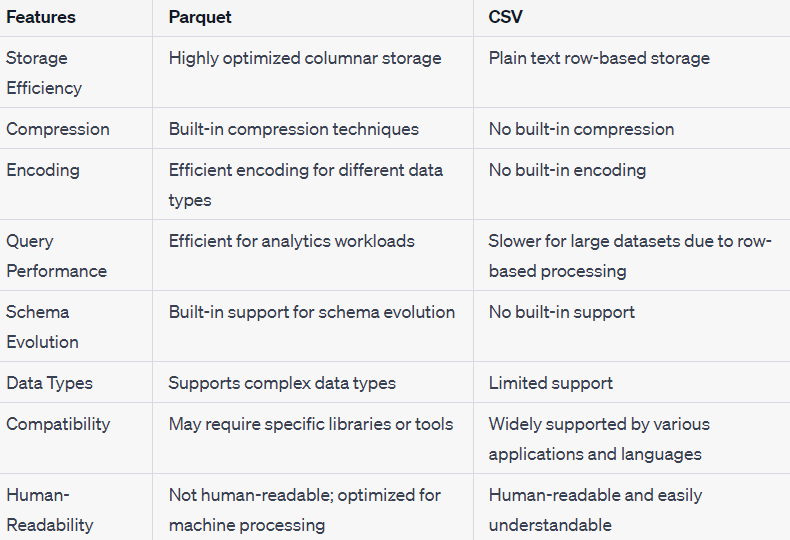

In [2]:
import pandas as pd

In [3]:
# we need to explicitly install 'pyarrow' library to use read_parquet() method in pandas
!pip install pyarrow -q

In [4]:
jan_dataset = pd.read_parquet(jan_data)
feb_dataset = pd.read_parquet(jan_data)

In [5]:
# casual checking the dataset to ensure that it has been downloaded and loaded successfully
jan_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
feb_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


## background of the dataset

About data: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Before we do the analysis of the data, we need to understand the meta information about the data, like where the data came from and what information does it carry. The above link provides a brief information about each column, which I have summarized below.


The yellow and green taxi trip record includes information like pickup and dropoff time, passenger count, trip distance, fare amount, payment type, extra, tips etc.
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP).


Now let's start doing exploratory analysis 

In [7]:
jan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
len(jan_dataset)

3066766

There are above 3M rows in the dataset

### Analyzing the columns

In [9]:
columns = list(jan_dataset.columns)

In [10]:
len(columns)

19

In [11]:
columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

So there are total 19 columns in the dataset. As per the problem statement we need to calculate the duration of a ride, so for this we need to subtract the dropoff datetime to the pickup datetime.

Let's go through each columns

## Assumptions

Now, let's figure out the interesting features that can be used to predict the trip time.

- We are going to need pickup datetime and dropoff datetime to prepare the target feature (i.e trip duration)
- we can use `pickup datetime` as an independent variable, since it can tells about the time like weekend or not 
- `Passenger count` could also have the influence to the trip time (we will later see the correlation)
- `trip distance` (we can alreay know from where customer going to picked and the destination)
- `PULocationID`, and `DoLocationID`, these are the location of pickup and dropped (so it is also important feature, since it will tell lots about traffic status over that area)

So for now we can say these are the important features to consider. 

### VendorID

A code indicating the TPEP provider that provided the record
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

In [12]:
jan_dataset.VendorID.unique()

array([2, 1])

Since, this is an ID about the data provider, so it doesn't carry any crucial information in the prediction of trip duration.

### Pickup and Dropoff datetime

In [13]:
jan_dataset.tpep_pickup_datetime.unique().size

1610975

In [14]:
jan_dataset.tpep_pickup_datetime[:10]

0   2023-01-01 00:32:10
1   2023-01-01 00:55:08
2   2023-01-01 00:25:04
3   2023-01-01 00:03:48
4   2023-01-01 00:10:29
5   2023-01-01 00:50:34
6   2023-01-01 00:09:22
7   2023-01-01 00:27:12
8   2023-01-01 00:21:44
9   2023-01-01 00:39:42
Name: tpep_pickup_datetime, dtype: datetime64[ns]